In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [70]:
parkinsons_data=pd.read_csv("D:\D_DATA\Learning\PGP-AIML\Ensemble Techniques/parkinsons.data",header=0)

print(parkinsons_data.shape)
print(parkinsons_data.head(10))
print(parkinsons_data.columns)
print(parkinsons_data.dtypes)
print(parkinsons_data.groupby(["status"]).count() )
print(parkinsons_data.isnull().sum().sum())
#print(parkinsons_data[~parkinsons_data.applymap(np.isreal).all(1)])

(195, 24)
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
0           0.00007   0.00370   0.00554     0.01109 

In [71]:
parkinsons_data = parkinsons_data.drop('name', axis=1)

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


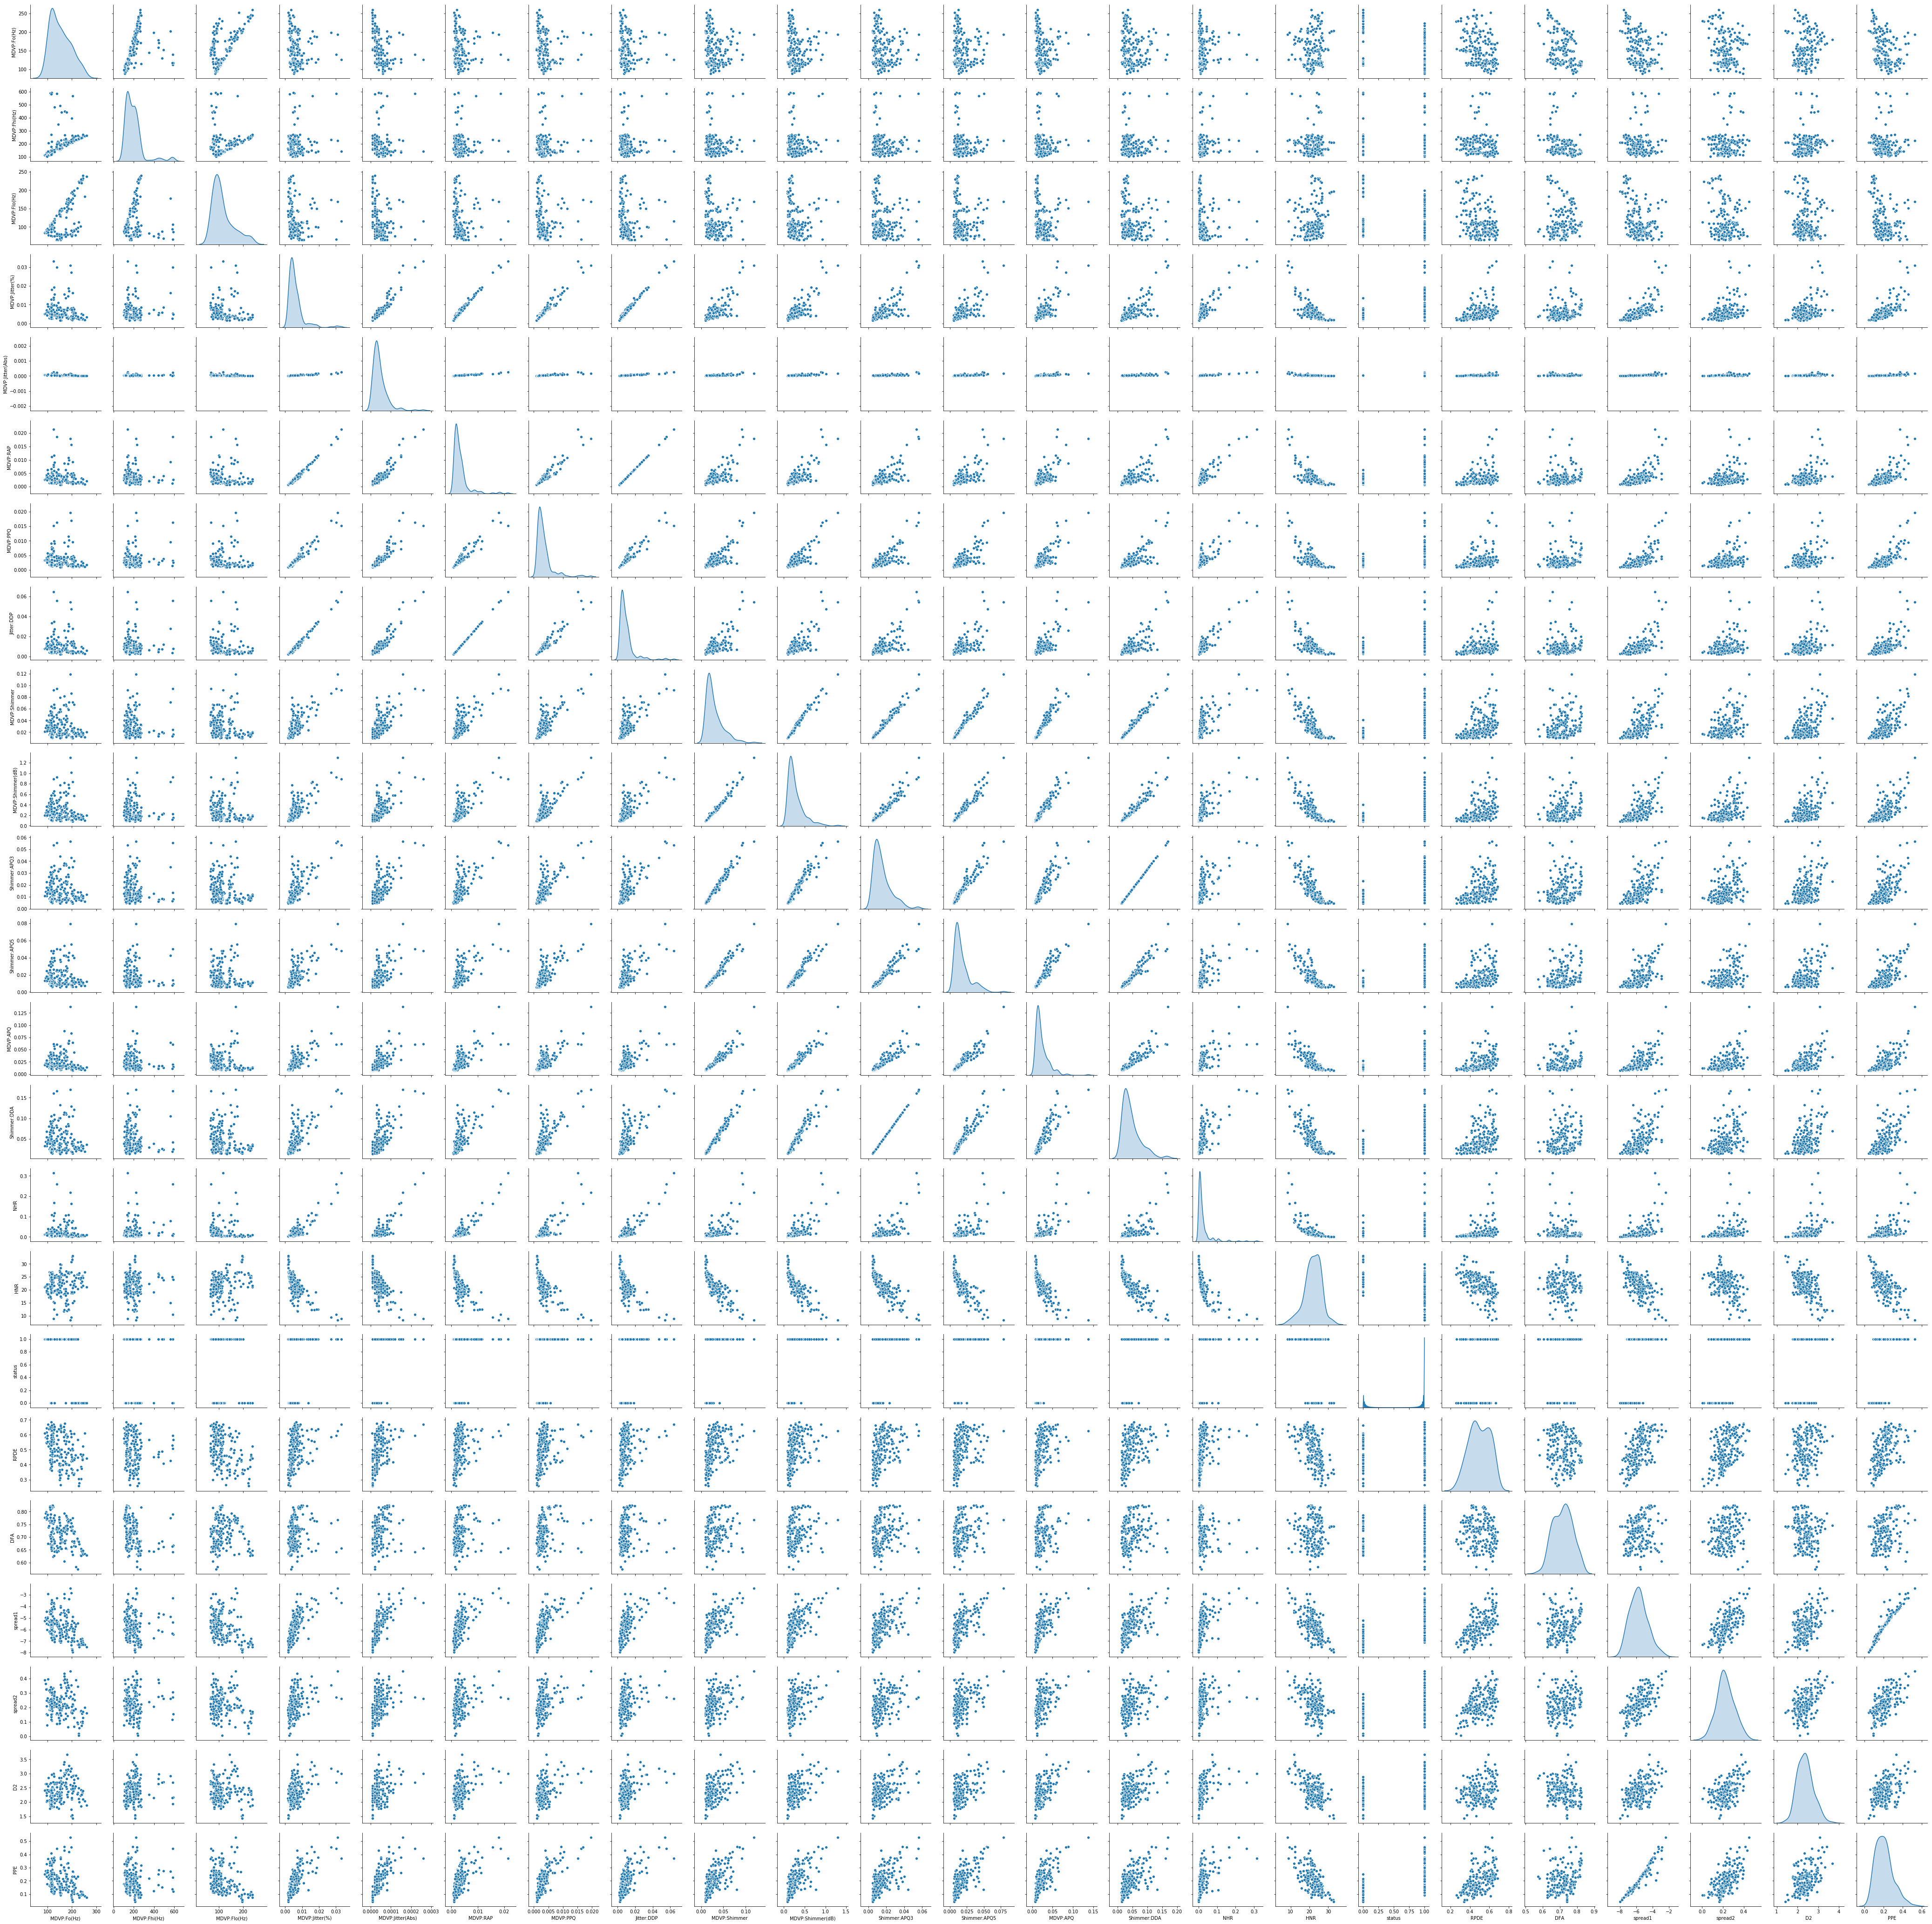

In [72]:
parkinsons_data.describe().transpose()
sns.pairplot(parkinsons_data,diag_kind='kde')
#The features MDVP:Fhi(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP seem to have outliers on the right. 
#Rest of the features are uniformly distributed. 

In [73]:
parkinsons_data.groupby(["status"]).count()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


In [74]:
# Copy all the predictor variables into X dataframe 
#parkinsons_data = parkinsons_data.drop('name', axis=1)
X = parkinsons_data.drop('status', axis=1)

y = parkinsons_data[['status']]

X.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [82]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [83]:
#my_model=LogisticRegression()
DTEntropy_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)


In [84]:
from sklearn.ensemble import BaggingClassifier
#Default base estimator is Decision Tree (CART)

bgcl = BaggingClassifier(base_estimator=DTEntropy_model,random_state=1,n_estimators=51)
bgcl.fit(X_train, y_train)
bgcl.score(X_test, y_test) # use this if you have reserved any dataset for testing

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

0.847457627118644

In [85]:
#In production any unseen new snapshot of data can be used for testing 
y_predict_DTEntropy = bgcl.predict(X_test)



In [86]:
#accuracy score
acc=metrics.accuracy_score(y_test,y_predict_DTEntropy)
print(acc)

0.847457627118644


In [87]:
cr=metrics.classification_report(y_test,y_predict_DTEntropy)
print(cr)

             precision    recall  f1-score   support

          0       0.92      0.58      0.71        19
          1       0.83      0.97      0.90        40

avg / total       0.86      0.85      0.84        59



In [88]:
cm=metrics.confusion_matrix(y_test,y_predict_DTEntropy)
print(cm)

[[11  8]
 [ 1 39]]


In [89]:
#print(DTEntropy_model.coef_)

pd.DataFrame(bgcl.predict_proba(X_test))

,0,1
0,0.039970,0.960030
1,0.000000,1.000000
2,0.019608,0.980392
3,0.513072,0.486928
4,0.039216,0.960784
5,0.313725,0.686275
6,0.000000,1.000000
7,0.156863,0.843137
8,0.677505,0.322495
9,0.103695,0.896305


In [90]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV
parameter1={'max_depth':np.arange(1,10)}
parameter2={'min_samples_leaf':np.arange(1,10)}

GS1=GridSearchCV(DTEntropy_model,parameter1,refit=True,cv=3)
GS2=GridSearchCV(DTEntropy_model,parameter2,refit=True,cv=3)

print(GS1.fit(X,y))
print(GS2.fit(X,y))

#print(GS.best_params_)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None

In [91]:
print("max_depth:best_params_:", GS1.best_params_)
print("max_depth:best_estimator_",GS1.best_estimator_)
print("max_depth:best_score_",GS1.best_score_)
print("max_depth:best_index_",GS1.best_index_)
print("max_depth:scorer_",GS1.scorer_)
print("max_depth:n_splits_",GS1.n_splits_)
#print(GS.refit_time_)
print("min_samples_leaf:best_params_:", GS2.best_params_)
print("min_samples_leaf:best_estimator_",GS2.best_estimator_)
print("min_samples_leaf:best_score_",GS2.best_score_)
print("min_samples_leaf:best_index_",GS2.best_index_)
print("min_samples_leaf:scorer_",GS2.scorer_)
print("min_samples_leaf:n_splits_",GS2.n_splits_)

#When left on its own, decision tree will continue to fit till each data point is in a different leaf. 
#This will not generalize well leading to overfitting. Hence we go for regularization through techniques like:
#(1) Limiting max depth of trees (2)bagging with more than 1 tree (3) stopping criterion like min gain, min samples in leaf, etc. 
#It seems there is too much of variation in sampling so i get different result. 
#Regularization: max_depth: The current result shows best score of .8308 with max_depth of 7. 
#Regularization: min_samples_leaf: The current result shows best score of 0.8462 with min_samples_leaf of 5. 


max_depth:best_params_: {'max_depth': 5}
max_depth:best_estimator_ DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
max_depth:best_score_ 0.8153846153846154
max_depth:best_index_ 4
max_depth:scorer_ <function _passthrough_scorer at 0x00000131A4A65730>
max_depth:n_splits_ 3
min_samples_leaf:best_params_: {'min_samples_leaf': 3}
min_samples_leaf:best_estimator_ DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            spli

In [92]:
pd.DataFrame(GS1.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005215,0.007375,0.0,0.0,1,{'max_depth': 1},0.753846,0.815385,0.753846,0.774359,0.029010,9,0.753846,0.884615,0.915385,0.851282,0.070033
1,0.000000,0.000000,0.0,0.0,2,{'max_depth': 2},0.846154,0.815385,0.753846,0.805128,0.038376,3,0.830769,0.884615,0.923077,0.879487,0.037859
2,0.005213,0.007372,0.0,0.0,3,{'max_depth': 3},0.784615,0.846154,0.723077,0.784615,0.050246,8,0.876923,0.946154,0.961538,0.928205,0.036802
3,0.000000,0.000000,0.0,0.0,4,{'max_depth': 4},0.830769,0.830769,0.753846,0.805128,0.036262,3,0.923077,0.992308,1.000000,0.971795,0.034592
4,0.005209,0.007367,0.0,0.0,5,{'max_depth': 5},0.830769,0.815385,0.800000,0.815385,0.012561,1,0.976923,1.000000,1.000000,0.992308,0.010879
5,0.000000,0.000000,0.0,0.0,6,{'max_depth': 6},0.830769,0.800000,0.738462,0.789744,0.038376,6,0.976923,1.000000,1.000000,0.992308,0.010879
6,0.005207,0.007363,0.0,0.0,7,{'max_depth': 7},0.830769,0.846154,0.738462,0.805128,0.047557,3,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.005244,0.007415,0.0,0.0,8,{'max_depth': 8},0.830769,0.861538,0.753846,0.815385,0.045291,1,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.001336,0.001889,0.0,0.0,9,{'max_depth': 9},0.830769,0.800000,0.738462,0.789744,0.038376,6,1.000000,1.000000,1.000000,1.000000,0.000000


In [93]:
pd.DataFrame(GS2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005224,0.007387,0.0,0.0,1,{'min_samples_leaf': 1},0.830769,0.907692,0.753846,0.830769,0.062807,4,0.976923,1.000000,1.000000,0.992308,0.010879
1,0.000000,0.000000,0.0,0.0,2,{'min_samples_leaf': 2},0.830769,0.753846,0.753846,0.779487,0.036262,6,0.969231,0.984615,0.984615,0.979487,0.007252
2,0.000000,0.000000,0.0,0.0,3,{'min_samples_leaf': 3},0.830769,0.861538,0.830769,0.841026,0.014505,1,0.969231,0.984615,0.969231,0.974359,0.007252
3,0.000000,0.000000,0.0,0.0,4,{'min_samples_leaf': 4},0.830769,0.846154,0.723077,0.800000,0.054754,5,0.969231,0.976923,0.953846,0.966667,0.009594
4,0.005208,0.007365,0.0,0.0,5,{'min_samples_leaf': 5},0.830769,0.907692,0.769231,0.835897,0.056643,3,0.969231,0.969231,0.953846,0.964103,0.007252
5,0.000000,0.000000,0.0,0.0,6,{'min_samples_leaf': 6},0.830769,0.892308,0.800000,0.841026,0.038376,1,0.969231,0.961538,0.953846,0.961538,0.006281
6,0.005207,0.007363,0.0,0.0,7,{'min_samples_leaf': 7},0.830769,0.753846,0.723077,0.769231,0.045291,8,0.961538,0.915385,0.953846,0.943590,0.020190
7,0.000000,0.000000,0.0,0.0,8,{'min_samples_leaf': 8},0.800000,0.753846,0.769231,0.774359,0.019188,7,0.946154,0.915385,0.953846,0.938462,0.016617
8,0.005194,0.007346,0.0,0.0,9,{'min_samples_leaf': 9},0.800000,0.753846,0.723077,0.758974,0.031612,9,0.938462,0.915385,0.953846,0.935897,0.015806


In [94]:
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=5,random_state=0 )

In [95]:
param_grid = [{'n_estimators': range(2, 100, 2), 'max_features': [2, 4, 6, 8]}]
GS3 = GridSearchCV(Rf_model, param_grid,cv=5)

print(GS3.fit(X,y))

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': range(2, 100, 2), 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [99]:
print("max_depth:best_params_:", GS3.best_params_)
print("max_depth:best_estimator_",GS3.best_estimator_)
print("max_depth:best_score_",GS3.best_score_)
print("max_depth:best_index_",GS3.best_index_)
print("max_depth:scorer_",GS3.scorer_)
print("max_depth:n_splits_",GS3.n_splits_)
#Optimal number of tress that gives best result is 12. 


max_depth:best_params_: {'max_features': 8, 'n_estimators': 12}
max_depth:best_estimator_ RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
max_depth:best_score_ 0.8256410256410256
max_depth:best_index_ 152
max_depth:scorer_ <function _passthrough_scorer at 0x00000131A4A65730>
max_depth:n_splits_ 5


In [100]:
pd.DataFrame(GS3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003125,0.006249,0.000000,0.000000,2,2,"{'max_features': 2, 'n_estimators': 2}",0.850,0.600,0.692308,...,0.692308,0.118566,196,0.825806,0.916129,0.916667,0.974522,0.949045,0.916434,0.050301
1,0.007552,0.007007,0.000000,0.000000,2,4,"{'max_features': 2, 'n_estimators': 4}",0.800,0.775,0.717949,...,0.758974,0.049526,191,0.916129,0.974194,0.974359,1.000000,0.961783,0.965293,0.027551
2,0.006249,0.007653,0.000000,0.000000,2,6,"{'max_features': 2, 'n_estimators': 6}",0.750,0.775,0.769231,...,0.758974,0.026998,191,0.929032,0.987097,0.967949,0.993631,0.955414,0.966624,0.023191
3,0.011091,0.006178,0.000000,0.000000,2,8,"{'max_features': 2, 'n_estimators': 8}",0.850,0.800,0.794872,...,0.784615,0.045891,182,0.961290,0.980645,0.974359,0.993631,0.961783,0.974342,0.012164
4,0.010166,0.000077,0.002014,0.003116,2,10,"{'max_features': 2, 'n_estimators': 10}",0.825,0.750,0.820513,...,0.779487,0.036691,190,0.987097,0.993548,1.000000,1.000000,0.974522,0.991033,0.009542
5,0.014454,0.003108,0.000777,0.001554,2,12,"{'max_features': 2, 'n_estimators': 12}",0.825,0.850,0.897436,...,0.820513,0.051459,2,0.974194,0.993548,0.993590,0.987261,0.980892,0.985897,0.007505
6,0.013477,0.004018,0.002051,0.003148,2,14,"{'max_features': 2, 'n_estimators': 14}",0.825,0.800,0.871795,...,0.800000,0.046914,73,0.974194,0.993548,1.000000,1.000000,0.987261,0.991001,0.009643
7,0.014274,0.002905,0.001612,0.003224,2,16,"{'max_features': 2, 'n_estimators': 16}",0.825,0.825,0.897436,...,0.810256,0.055604,7,0.980645,0.987097,1.000000,1.000000,0.980892,0.989727,0.008701
8,0.015384,0.003263,0.000807,0.001613,2,18,"{'max_features': 2, 'n_estimators': 18}",0.825,0.825,0.897436,...,0.810256,0.055604,7,0.993548,0.987097,1.000000,1.000000,0.987261,0.993581,0.005734
9,0.027588,0.013571,0.001643,0.001517,2,20,"{'max_features': 2, 'n_estimators': 20}",0.800,0.825,0.871795,...,0.800000,0.046914,73,0.987097,0.980645,1.000000,1.000000,0.987261,0.991001,0.007726


In [101]:
pd.DataFrame(GS3.grid_scores_)

,parameters,mean_validation_score,cv_validation_scores
0,"{'max_features': 2, 'n_estimators': 2}",0.692308,"[0.85, 0.6, 0.6923076923076923, 0.526315789473..."
1,"{'max_features': 2, 'n_estimators': 4}",0.758974,"[0.8, 0.775, 0.717948717948718, 0.684210526315..."
2,"{'max_features': 2, 'n_estimators': 6}",0.758974,"[0.75, 0.775, 0.7692307692307693, 0.7105263157..."
3,"{'max_features': 2, 'n_estimators': 8}",0.784615,"[0.85, 0.8, 0.7948717948717948, 0.710526315789..."
4,"{'max_features': 2, 'n_estimators': 10}",0.779487,"[0.825, 0.75, 0.8205128205128205, 0.7368421052..."
5,"{'max_features': 2, 'n_estimators': 12}",0.820513,"[0.825, 0.85, 0.8974358974358975, 0.7631578947..."
6,"{'max_features': 2, 'n_estimators': 14}",0.800000,"[0.825, 0.8, 0.8717948717948718, 0.73684210526..."
7,"{'max_features': 2, 'n_estimators': 16}",0.810256,"[0.825, 0.825, 0.8974358974358975, 0.736842105..."
8,"{'max_features': 2, 'n_estimators': 18}",0.810256,"[0.825, 0.825, 0.8974358974358975, 0.736842105..."
9,"{'max_features': 2, 'n_estimators': 20}",0.800000,"[0.8, 0.825, 0.8717948717948718, 0.73684210526..."


In [102]:
#Regularization of Decision Tree

In [103]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt_model.fit(X_train, y_train)
train_char_label = ['1', '2', '3']


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [104]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
parkinson_tree_regularized = open('parkinson_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= parkinson_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

parkinson_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.245788
MDVP:Fhi(Hz)      0.111931
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.118884
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.089061
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.434335


In [105]:
print("Now the importance of column is distributed among MDVP:Flo(Hz),Shimmer:APQ3,PPE. Before it was only PPE ")

Now the importance of column is distributed among MDVP:Flo(Hz),Shimmer:APQ3,PPE. Before it was only PPE 


In [106]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng parkinson_tree_regularized.dot -o parkinson_tree_regularized.png")
#Image("parkinson_tree_regularized.png")

1

In [107]:
y_pred = dt_model.predict(X_test)

In [108]:
dt_model.score(X_test , y_test)

0.9152542372881356

In [109]:
cm=metrics.confusion_matrix(y_pred , y_test )
print(cm)

[[16  2]
 [ 3 38]]


In [110]:
from sklearn import metrics
cr=metrics.classification_report(y_pred , y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.84      0.89      0.86        18
          1       0.95      0.93      0.94        41

avg / total       0.92      0.92      0.92        59



In [111]:
Dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=0 )
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',max_depth=3,random_state=0 ,oob_score=True)

In [112]:
Rf_model.fit(X_train, y_train)
Dt_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [113]:
y_predict_Rf=Rf_model.predict(X_test)
y_predict_Dt=Dt_model.predict(X_test)

In [114]:
Rf_acc=metrics.accuracy_score(y_test,y_predict_Rf)
print(Rf_acc)

Dt_acc=metrics.accuracy_score(y_test,y_predict_Dt)
print(Dt_acc)

0.7966101694915254
0.9152542372881356


In [115]:
Rf_cr=metrics.classification_report(y_test , y_predict_Rf)
print(Rf_cr)
Dt_cr=metrics.classification_report(y_test , y_predict_Dt)
print(Dt_cr)


             precision    recall  f1-score   support

          0       0.89      0.42      0.57        19
          1       0.78      0.97      0.87        40

avg / total       0.82      0.80      0.77        59

             precision    recall  f1-score   support

          0       0.89      0.84      0.86        19
          1       0.93      0.95      0.94        40

avg / total       0.91      0.92      0.91        59



In [116]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.Series(Rf_model.feature_importances_,index = list(X)).sort_values(ascending=False))

PPE                 0.138380
spread1             0.117776
MDVP:APQ            0.082105
MDVP:Fo(Hz)         0.074640
MDVP:Fhi(Hz)        0.064892
MDVP:Shimmer        0.059422
MDVP:Shimmer(dB)    0.057099
MDVP:RAP            0.056836
Shimmer:DDA         0.053173
Shimmer:APQ5        0.042543
spread2             0.041176
D2                  0.035773
Jitter:DDP          0.029039
MDVP:Flo(Hz)        0.025756
Shimmer:APQ3        0.023151
MDVP:Jitter(Abs)    0.021221
DFA                 0.017210
RPDE                0.016627
HNR                 0.013140
NHR                 0.011736
MDVP:PPQ            0.009259
MDVP:Jitter(%)      0.009048
dtype: float64


In [117]:
Rf_model.oob_score_

0.875

In [118]:
models = []
models.append(('DecisionTree', Dt_model))
models.append(('RandomForest', Rf_model))

In [119]:
X_std = StandardScaler().fit_transform(X)

DecisionTree: 0.820513 (0.122434)
RandomForest: 0.779487 (0.170547)


Text(0.5,0.98,'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x131d38dc518>,
 'caps': [<matplotlib.lines.Line2D at 0x131d3830390>,
 'boxes': [<matplotlib.lines.Line2D at 0x131d25eccf8>,
 'medians': [<matplotlib.lines.Line2D at 0x131b2eac668>,
 'fliers': [<matplotlib.lines.Line2D at 0x131cc6d6dd8>,
 'means': []}

[Text(0,0,'DecisionTree'), Text(0,0,'RandomForest')]

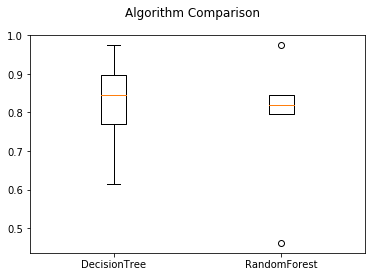

In [120]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [121]:
results

[array([0.84615385, 0.76923077, 0.8974359 , 0.97435897, 0.61538462]),
 array([0.79487179, 0.82051282, 0.84615385, 0.97435897, 0.46153846])]

In [122]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test , y_predict_Dt)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8960526315789472